In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вводные данные

In [23]:
date_name = "Дата"
y_name = "Значение инфляции"
protected_columns = "" #"Долг!;Реальный M2 справочно"

max_lag_down = 18
max_lag_up = 18

In [24]:
protected_columns = protected_columns.split(';')
protected_columns

['']

In [25]:
df = pd.read_excel("data.xlsx")
df_final = df.copy()
X_columns = df.columns.tolist()

columns_to_drop = protected_columns + [y_name, date_name]

#print(columns_to_drop)

for col in columns_to_drop:
    try:
        X_columns.remove(col)
    except:
        print(X_columns)
        print(col)

X_columns

['Дата', 'Значение инфляции', 'Значение М2', 'Динамика М2', 'Реальный M2 справочно', 'сдвиг М2 6 мес', 'Динамика USD', 'Динамика USD (сдвиг 6 мес)', 'Долг!', 'Ключевая ставка', 'Срвзвеш кред.ставка более 1 года физлица', 'Срвзвеш кред.ставка более 1 года организации']



['Значение М2',
 'Динамика М2',
 'Реальный M2 справочно',
 'сдвиг М2 6 мес',
 'Динамика USD',
 'Динамика USD (сдвиг 6 мес)',
 'Долг!',
 'Ключевая ставка',
 'Срвзвеш кред.ставка более 1 года физлица',
 'Срвзвеш кред.ставка более 1 года организации']

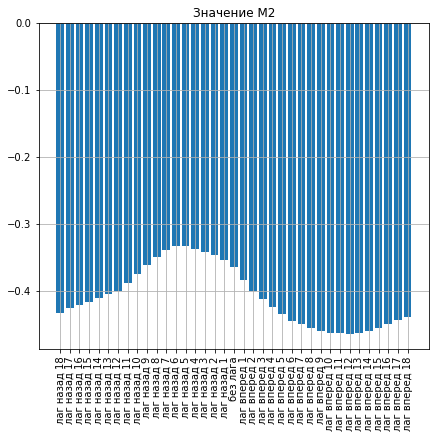

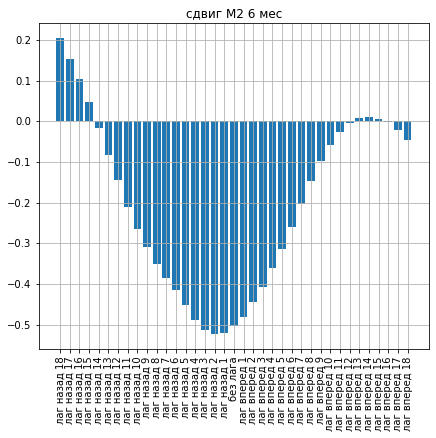

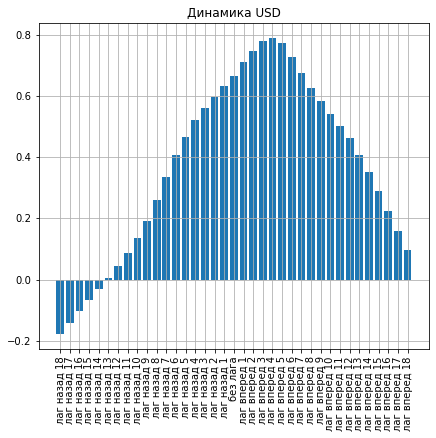

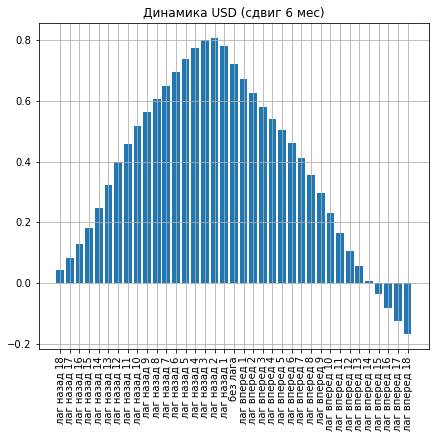

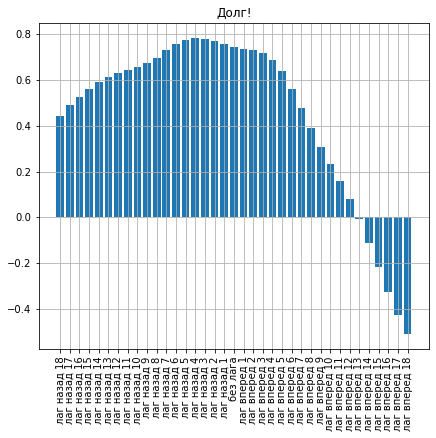

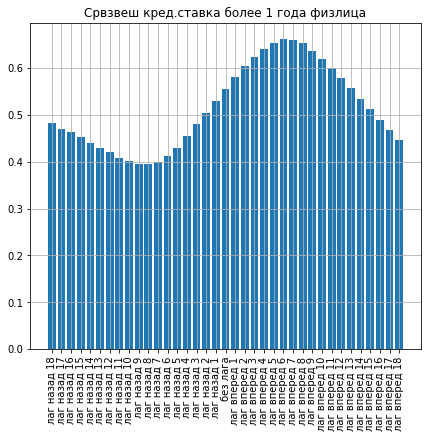

In [26]:
#добавить смещение вверх
#добавить знаки корреляции

for x in X_columns:
    df_x = df.loc[:, [date_name, y_name, x]]
    df_x = df_x.dropna()
    
    for i in range(1, max_lag_down+1):
        df_x[f"{x}_lag_down_{i}"] = df_x[x].shift(i)
        
    for i in range(1, max_lag_up+1):
        df_x[f"{x}_lag_up_{i}"] = df_x[x].shift(-i)
        
    df_x.to_excel(f'Excel_lags/{x}_lags.xlsx')
        
    #df_x = df_x.dropna()
    df_x_corr = df_x.corr()
    
    cor_series = df_x_corr.iloc[1:, 0]
    lags_names = ['без лага'] + [f"лаг назад {i}" for i in range(1, max_lag_down+1)] \
                + [f"лаг вперед {i}" for i in range(1, max_lag_up+1)]
    cor_series.index = lags_names
    cor_series = cor_series.loc[ [f"лаг назад {i}" for i in range(max_lag_down, 0, -1)] + ['без лага'] \
                                    +[f"лаг вперед {i}" for i in range(1, max_lag_up+1)]]
    
    plt.figure(figsize=(7, 6))
    plt.grid()
    plt.bar(cor_series.index, cor_series)
    plt.title(x)
    plt.xticks(rotation=90)
    plt.savefig(f'Pictures/{x}_lags_pic.png', bbox_inches = 'tight')
    plt.show()
    
    cor_series.to_excel(f'Excels/{x}_lags.xlsx')

In [14]:
df_final.to_excel("result.xlsx")